In [1]:
import evaluate
import numpy as np
from RFDN import RFDN, RFDN1
from FDCN import FDCN
from BaseN import BaseN
from SRN import SRN

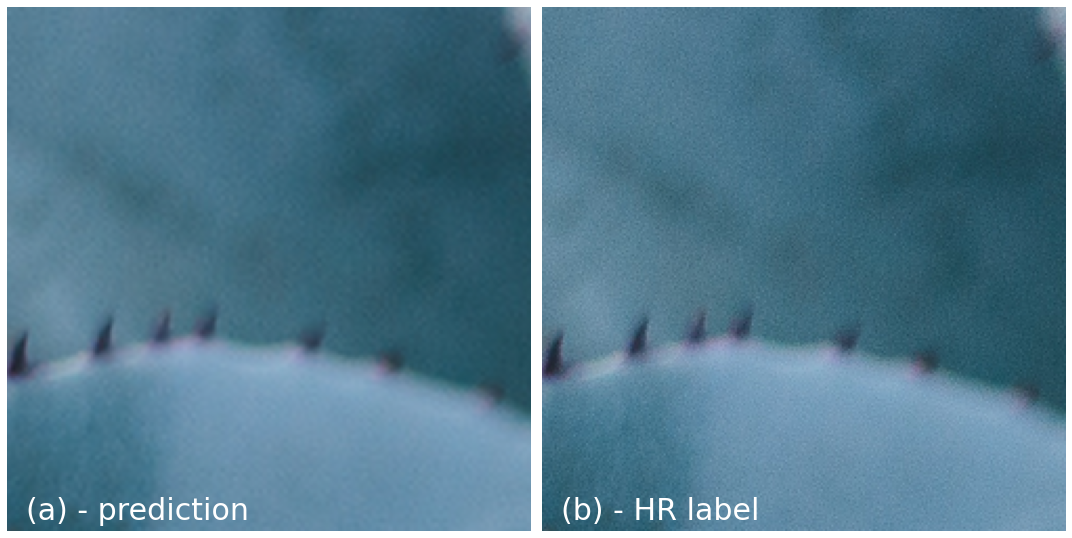

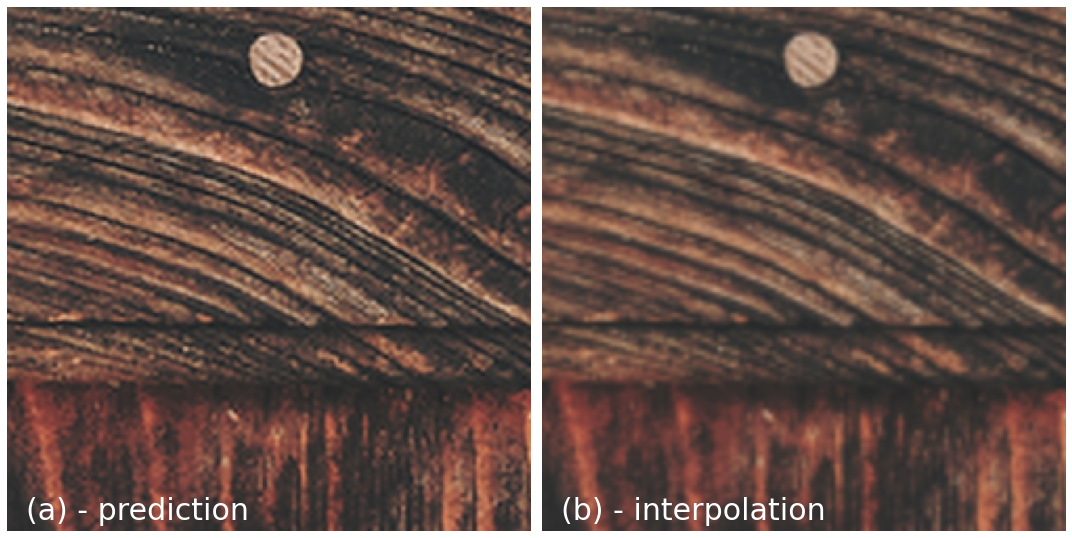

In [2]:
# model = RFDN(nf=10, upscale=2)
# model = FDCN(nf=10, upscale=2)
# model = BaseN(nf=10, upscale=2)
model = RFDN1(nf=10, upscale=2)
# model = SRN(nf=10, upscale=2)
checkpoint_file = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/AvgLearningCurve/RFDN1/checkpoint_2_40.tar"
# checkpoint_file = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/checkpoint_0_1.tar"
data_dir = "/home/samuel/Documents/CMPUT511/Project/Data"

e = evaluate.Evaluate(model, checkpoint_file, data_dir)
e.compare_patches(56, size=250, start=(110,200))
e.compare_interpolation(84, size=250, start=(700,770))

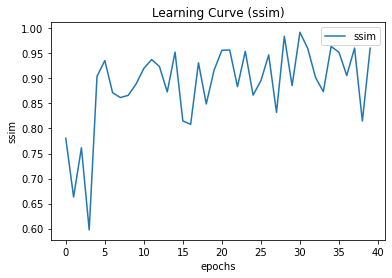

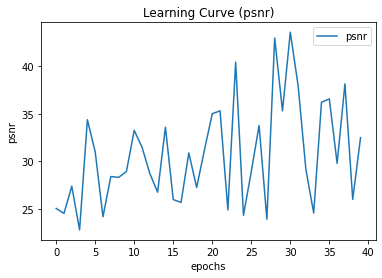

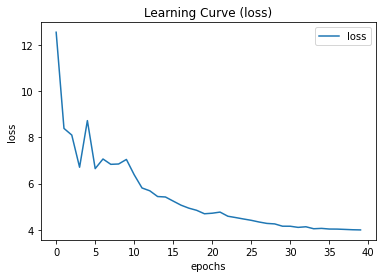

In [3]:
e.plot_lc("ssim")
e.plot_lc("psnr")
e.plot_lc("loss")

In [4]:
e.predict(99, img_name="/home/samuel/Documents/CMPUT511/Project/Checkpoints/checkpoint.jpg")

PSNR: 31.645091552064116
SSIM: 0.9297833442687988
Average Loss: 5.436535434512239
Saving image


In [5]:
values = e.get_values()
psnr = np.mean(values["psnr"])
ssim = np.mean(values["ssim"])
time = np.mean(values["times"])
params = sum(param.numel() for param in model.parameters())

100%|██████████| 100/100 [02:02<00:00,  1.22s/it]


In [6]:
print(f"Average PSNR:              {psnr}")
print(f"Average SSIM:              {ssim}")
print(f"Average Inference Time:    {time}")
print(f"Number of parameters:      {params}")

Average PSNR:              32.6316584421872
Average SSIM:              0.9209140539169312
Average Inference Time:    0.09806752681732178
Number of parameters:      9652
